In [124]:
import numpy as np
import pandas as pd

# opening california house prices dataset

dataPath = "chp/chp.csv"

chp = pd.read_csv(dataPath)

# print(len(chp.index))

print("Read file to dataframe successfully")

# dropping rows which contain NaN
chp = chp.dropna(axis=0)

# print(len(chp.index))

# dropping columns that are not necessary
# longitude, latitude, ocean_proximity

chp = chp.drop(labels=["longitude", "latitude", "ocean_proximity"], axis=1)

chp.head(10)

Read file to dataframe successfully


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
5,52,919,213.0,413,193,4.0368,269700
6,52,2535,489.0,1094,514,3.6591,299200
7,52,3104,687.0,1157,647,3.1200,241400
8,42,2555,665.0,1206,595,2.0804,226700
9,52,3549,707.0,1551,714,3.6912,261100


In [125]:
from sklearn import preprocessing

# standardizing dataset using standard scaler
scaler = preprocessing.StandardScaler().fit(chp)
chp_scaled = scaler.transform(chp)
chp_scaled = pd.DataFrame(chp_scaled, columns=[
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value'
])

chp_scaled.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418


In [126]:
from sklearn.model_selection import train_test_split

# X is the information
# y is the value to be predicted using X
X = chp_scaled.drop(labels=["median_house_value"], axis=1)
y = chp_scaled[["median_house_value"]].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

In [127]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


huber = HuberRegressor().fit(X_train, y_train.values.ravel())
print("Score: ", round(huber.score(X_train, y_train), 2))

y_pred = pd.DataFrame(huber.predict(X_test), columns = [
    'Predictions'
])

# Calculating mean absolute error, mean squared error
# and root mean squared error
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Score:  0.56
Mean Absolute Error:  0.47
Mean Squared Error:  0.44
Root Mean Squared Error:  0.66


Text(0.5, 1.0, 'California House Prices - Huber Regression (No dataset dimensionality reduction)')

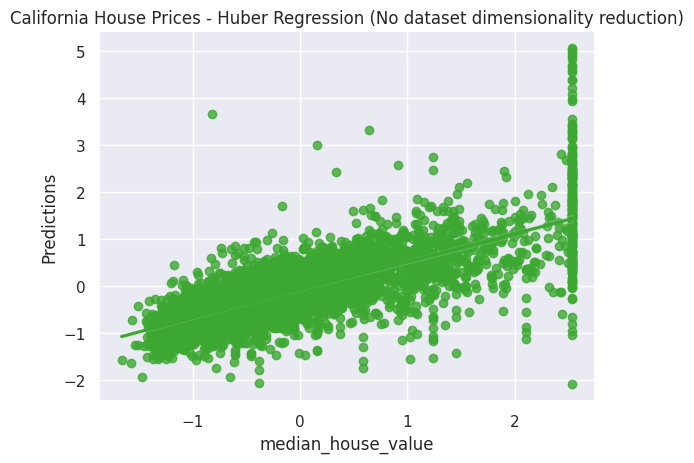

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

y_test_and_pred = pd.concat([y_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis = 1)

sns.regplot(
    data=y_test_and_pred,
    x = 'median_house_value',
    y = 'Predictions',
    color="#3ca832"
).set_title("California House Prices - Huber Regression (No dataset dimensionality reduction)")